1.  Mostraremos la manera de trabajar con tensores abstractos

In [1]:
import sympy
from sympy import *
from sympy.vector import *
init_printing()

Consideremos el siguiente campo escalar en coordenadas cartesianas:
$$
f=3x^2y+xz^3-yz\,,
$$

Los campos escalares y campos vectoriales que varían con la posición  se pueden construir usando "BaseScalar" de la manera siguinte

In [2]:
R = CoordSys3D('R')
f = 3*R.x**2*R.y+R.x*R.z**3-R.y*R.z
f

El operador "Del()" puede funcionar de la manera siguiente

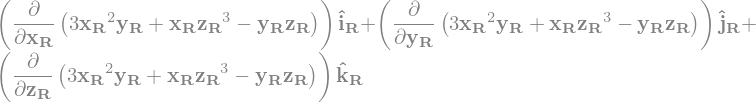

In [3]:
delop = Del()
gradient_field = delop(f)
gradient_field

Con ".doit()" se ejecuta el cálculo que se había dejado indicado.

In [4]:
gradient_field.doit()

O utilizar  directamnte:

In [5]:
gradient(f)

el rotor de lo anterior es:

In [6]:
curl(_)

Esto significa que el gradiente de la función $f$ es un campo irrotacional.

Para el laplaciano de $f$ podemos hacer

In [7]:
divergence(gradient(f))

Si queremos calcular el laplaciano del siguiente campo escalar
$$
f=r \cos^2(\varphi)\,\cos(\theta) \, \mathrm{sen}^2(\theta)\,,
$$
en coordenadas esféricas.

Podemos definir el sistema de coordenas de la manera siguiente:

In [8]:
s = CoordSys3D('s', transformation='spherical', variable_names=("r", "theta", "phi"))
s

In [9]:
print(s.base_scalars())

(s.r, s.theta, s.phi)


Primero escribimos el campo escalar

In [10]:
f= s.r*cos(s.phi)**2*cos(s.theta)*sin(s.theta)**2
f

Luego claculamos el gradiente:

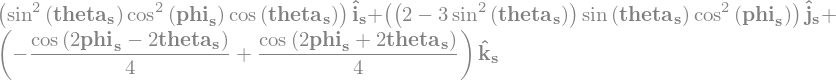

In [11]:
gradient(f).simplify()

La divergencia del gradiante es el laplaciano:

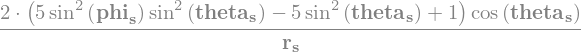

In [12]:
divergence(gradient(f)).simplify()

Si queremos demostrar la siguiente identidad:
$$
{\boldsymbol \nabla} \cdot \left[ {\boldsymbol \nabla}f \times {\boldsymbol \nabla}g \right]  = 0
$$
podemos proceder como se muestra a continuación. 

In [13]:
f, g = symbols('f g', cls=Function)
ffield = f(R.x, R.y, R.z)
gfield = g(R.x, R.y, R.z)

In [14]:
grad_f = gradient(ffield)
grad_g = gradient(gfield)
divergence(grad_f.cross(grad_g ))

También es posible manipular expresiones vectoriales, por ejemplo:
$$
(\boldsymbol{\nabla} \cdot \boldsymbol{\nabla}) \mathbf{A}=\boldsymbol{\nabla}(\boldsymbol{\nabla} \cdot \mathbf{A})-\boldsymbol{\nabla} \times(\boldsymbol{\nabla} \times \mathbf{A})
$$

In [15]:
a1, a2, a3 = symbols('a1 a2 a3', cls=Function)
Afield = a1(R.x, R.y, R.z)*R.i + a2(R.x, R.y, R.z)*R.j + a3(R.x, R.y, R.z)*R.k

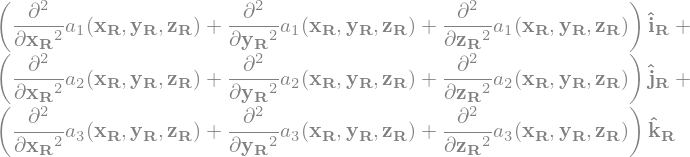

In [16]:
gradient(divergence(Afield))- curl(curl(Afield))

SymPy contiene un paquete para geometría diferencial donde podemos definir una Variedad y sistemas de coordenadas (parches)

In [17]:
from sympy.diffgeom import *
m = Manifold('M', 3)
p = Patch('P', m)
m.dim, p.dim

Mostramos aquí dos sistemas de coordenadas, el cartesiano y el esférico:

In [18]:
x, y, z = symbols('x y z', real=True)
r, θ, ϕ = symbols('r θ ϕ', nonnegative=True)
relation_dict = {
('car', 'esf'): [(x, y, z), (sqrt(x**2 + y**2+z**2), atan(y/x),atan(sqrt(x**2+y**2)/z))],
('esf', 'car'): [(r, θ, ϕ), (r*cos(ϕ)*sin(θ), r*sin(ϕ)*sin(θ),r*cos(θ))]
}
car = CoordSystem('car', p, (x, y, z), relation_dict)
esf = CoordSystem('esf', p, (r, θ, ϕ), relation_dict)

In [19]:
esf.transformation(car) , car.transformation(esf)

⎛                                           ⎡   ______________ ⎤⎞
⎜                                           ⎢  ╱  2    2    2  ⎥⎟
⎜                                           ⎢╲╱  x  + y  + z   ⎥⎟
⎜                                           ⎢                  ⎥⎟
⎜            ⎡r⋅sin(θ)⋅cos(ϕ)⎤              ⎢         ⎛y⎞      ⎥⎟
⎜            ⎢               ⎥              ⎢     atan⎜─⎟      ⎥⎟
⎜(r, θ, ϕ) ↦ ⎢r⋅sin(θ)⋅sin(ϕ)⎥, (x, y, z) ↦ ⎢         ⎝x⎠      ⎥⎟
⎜            ⎢               ⎥              ⎢                  ⎥⎟
⎜            ⎣   r⋅cos(θ)    ⎦              ⎢    ⎛   _________⎞⎥⎟
⎜                                           ⎢    ⎜  ╱  2    2 ⎟⎥⎟
⎜                                           ⎢    ⎜╲╱  x  + y  ⎟⎥⎟
⎜                                           ⎢atan⎜────────────⎟⎥⎟
⎝                                           ⎣    ⎝     z      ⎠⎦⎠

Consideremos la siguiente transformación de coordenadas esféricas a cartesianas:

In [20]:
esf.jacobian(car)

⎡sin(θ)⋅cos(ϕ)  r⋅cos(θ)⋅cos(ϕ)  -r⋅sin(θ)⋅sin(ϕ)⎤
⎢                                                ⎥
⎢sin(θ)⋅sin(ϕ)  r⋅sin(ϕ)⋅cos(θ)  r⋅sin(θ)⋅cos(ϕ) ⎥
⎢                                                ⎥
⎣   cos(θ)         -r⋅sin(θ)            0        ⎦

In [21]:
p = esf.point([1, pi/2, pi/2])
car.point_to_coords(p)

SymPy tiene sus coordenadas R^n ya predefinadas  así como las leyes de transformación entre ellos.

Se puede acceder a las funciones de coordenadas como atributos de la variedad (por ejemplo, "R2.x"),
como atributos de los sistemas de coordenadas (por ejemplo, "R2_r.x" y "R2_p.theta"), o  usando la interfaz habitual "coord_sys.coord_function(index, name)".

Por ejemplo "R3_r" se refiere a coordenadas cartesianas,  "R3_s" a coordenadas esféricas y "R3_c" a coordenadas cilíndricas.

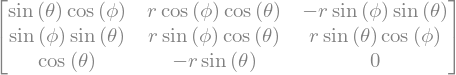

In [22]:
from sympy.diffgeom.rn import R3, R3_r, R3_s
R3_s.jacobian(R3_r)

In [23]:
R3_r.base_scalars(), R3_r.base_vectors(),R3_r.base_oneforms()

In [24]:
fx, fy, fz = R3_r.base_scalars()
e_x, e_y, e_z = R3_r.base_vectors()
dx, dy,dz = R3_r.base_oneforms()

In [25]:
R3_s.base_scalars(), R3_s.base_vectors(), R3_s.base_oneforms()

In [26]:
fr, ft, fp = R3_r.base_scalars()
e_rho, e_theta, e_phi = R3_s.base_vectors()
dr, dt,dp = R3_s.base_oneforms()

El diferencial $df$ of the 0-forma $f$ se define para cualquier campo vectoral  $v$ como $d f(v)=v(f)$

In [27]:
g = Function('g')
v_field = g(fx, fy, fz)
dg = Differential(v_field)
dg

El producto tensorial permite la creación de funcionales multilineales (es decir, tensores de orden superior) a partir de campos de orden inferior, por ejemplo, 1-formas y campos vectoriales. Sin embargo, los tensores superiores así creados carecen de las características interesantes que proporciona el otro tipo de producto, el producto en tensorial.

In [28]:
TensorProduct(dx, dy)(e_x, e_y), TensorProduct(dx, dy)(e_y, e_x)

In [29]:
TensorProduct(dx, fx*dy)(fx*e_x, e_y), TensorProduct(e_x, e_y)(fx**2, fy**2)

La métrica en coordenadas cartesianas:

In [30]:
TP = TensorProduct
metric = TP(dx, dx) + TP(dy, dy)+ TP(dz, dz)
metric

In [31]:
metric.rcall(e_y)

Los símbolos de Christoffel de primer y segundo tipo 

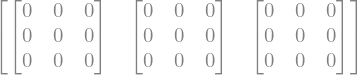

In [32]:
metric_to_Christoffel_1st(metric )

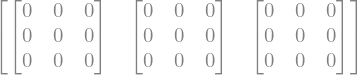

In [33]:
ch = metric_to_Christoffel_2nd(metric )
ch

Operador derivada covariante respecto de un vector base:

In [34]:
cvd = BaseCovarDerivativeOp(R3_r, 0, ch)
cvd(fx)

In [35]:
cvd(fx*e_x)

In [36]:
cvd = CovarDerivativeOp(fx*e_x, ch)
cvd(fx)

In [37]:
cvd(fx*e_x)

El tensor métrico en coordenadas esféricas 

In [38]:
metric_s=  TP(dr, dr) + R3_s.r**2*TP(dt, dt) + (R3_s.r*sin(R3_s.theta))**2*TP(dp, dp)
metric_s

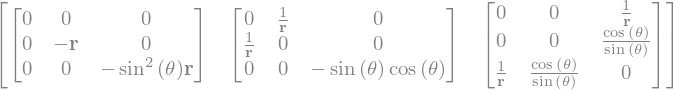

In [39]:
ch = metric_to_Christoffel_2nd(metric_s)
ch

In [40]:
metric_to_Christoffel_2nd(metric_s)[0, 1, 1], metric_to_Christoffel_2nd(metric_s)[0, 2, 2]

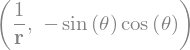

In [41]:
metric_to_Christoffel_2nd(metric_s)[1, 1, 0], metric_to_Christoffel_2nd(metric_s)[1, 2, 2] 

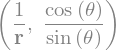

In [42]:
metric_to_Christoffel_2nd(metric_s)[2, 2, 0], metric_to_Christoffel_2nd(metric_s)[2, 2, 1] 